#### Workflow for Building and Saving a Text Classification Model (using logistic regression)

Steps for classification
1. Prepare the data: Read in labelled data and preprocess the data
2. Split the data: Separate inputs and outputs into a training set and a test set, repsectively
3. Numerically encode inputs: Using Count Vectorizer or TF-IDF Vectorizer
4. Fit a model: Fit a model on the training data and apply the fitted model to the test set
5. Evaluate the model: Decide how good the model is by calculating various error metrics
6. Save the model


#### Step 1: Prepare the data: Read in labelled data and preprocess the data

In [6]:
# make sure the data is labeled
import pandas as pd

data = pd.read_table('./data/SMSSpamCollection.txt', header=None)
data.columns = ['label', 'text']
print(data.head()) # print function requires Python 3


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
# remove words with numbers, punctuation and capital letters
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)
print(data.head())


  label                                               text
0   ham  go until jurong point  crazy   available only ...
1   ham                      ok lar    joking wif u oni   
2  spam  free entry in   a wkly comp to win fa cup fina...
3   ham  u dun say so early hor    u c already then say   
4   ham  nah i don t think he goes to usf  he lives aro...


#### Step 2. Split the data: Separate inputs and outputs into a training set and a test set, repsectively

In [8]:
# split the data into inputs and outputs
X = data.text # inputs into model
Y = data.label # output of model


In [9]:
X.head()

0    go until jurong point  crazy   available only ...
1                        ok lar    joking wif u oni   
2    free entry in   a wkly comp to win fa cup fina...
3    u dun say so early hor    u c already then say   
4    nah i don t think he goes to usf  he lives aro...
Name: text, dtype: object

In [10]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [11]:
# split the data into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# test size = 30% of observations, which means training size = 70% of observations
# random state = 42, so we all get the same random train / test split

In [12]:
''' To see shape
X_train.head()
X_train.shape
y_train.head()
y_train.shape
'''

' To see shape\nX_train.head()\nX_train.shape\ny_train.head()\ny_train.shape\n'

In [13]:
X.shape

(5572,)

#### 3. Numerically encode inputs: Using Count Vectorizer 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

X_train_cv = cv.fit_transform(X_train) # fit_transform learns the vocab and one-hot encodes
X_test_cv  = cv.transform(X_test) # transform uses the same vocab and one-hot encodes

# print the dimensions of the training set (text messages, terms)
print(X_train_cv.toarray().shape)
print(X_test_cv.toarray().shape)

# Take note of the number of terms (6103). This will affect the operationlization

(3900, 6103)
(1672, 6103)


#### 4. Fit a model: Fit a model on the training data and apply the fitted model to the test set
* Use logistic regression model

In [15]:
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')

# Train the model
lr.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data
y_pred_cv = lr.predict(X_test_cv)
y_pred_cv # The output is all of the predictions


array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

#### 5. Evaluate the model: Decide how good the model is by calculating various error metrics

Accuracy: 0.985
Precision: 1.0
Recall: 0.888
F1 Score: 0.941


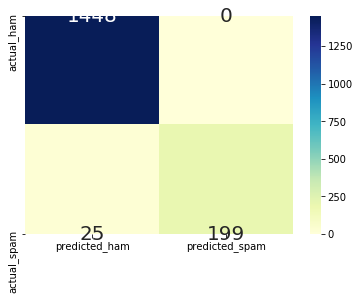

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))


#### 6. Save the model

In [17]:
#We need to save the model for reloading in the deployed application.
#We also need to save the counter vectorizer in order to retain the vocabulary information

import pickle
from datetime import datetime

time = datetime.now().strftime("%Y-%m-%d")
path1 = 'classifier-{}.pkl'.format(time)

path2 = 'countvectoriser-{}.pkl'.format(time)
with open(path1, 'wb') as f1:
    pickle.dump(lr, f1)
    
with open(path2, 'wb') as f2:
    pickle.dump(cv, f2)


## The saved model  requires an input requiring 6103 features. 



In [ ]:
#### end ###